## Car Sale Process
### Process is described by the following Petri Net based diagram where flashes are tokens.

![Process Diagram](PN1.png)

### Modules must be imported first:

In [7]:
from petrinet import PetriNet
from place import Place
from transition import Transition
from petrinetgraph import GPlace, GTransition, PetriNetGraph

### PetriNet is initialized and places from diagram defined.
Every place is instantiated with its name and number of tokens. 

In [8]:
pn = PetriNet()

p00 = Place("Customer", 1)
p01 = Place("Customer")
p02 = Place("Customer")
p03 = Place("Customer")
pn.add_place(p00)
pn.add_place(p01)
pn.add_place(p02)
pn.add_place(p03)

p10 = Place("Salesman", 1)
p11 = Place("Salesman")
p12 = Place("Salesman")
p13 = Place("Salesman")
pn.add_place(p10)
pn.add_place(p11)
pn.add_place(p12)
pn.add_place(p13)

p20 = Place("Order")
p21 = Place("Order")
pn.add_place(p20)
pn.add_place(p21)

p40 = Place("Accountant", 1)
p50 = Place("Financing")
p60 = Place("Car")
p70 = Place("Protocol")
pn.add_place(p40)
pn.add_place(p50)
pn.add_place(p60)
pn.add_place(p70)

print("Set of places: ")
for place in pn.places:
    place.print()

Set of places: 
Place Customer has 1 token(s)
Place Customer has 0 token(s)
Place Customer has 0 token(s)
Place Customer has 0 token(s)
Place Salesman has 1 token(s)
Place Salesman has 0 token(s)
Place Salesman has 0 token(s)
Place Salesman has 0 token(s)
Place Order has 0 token(s)
Place Order has 0 token(s)
Place Accountant has 1 token(s)
Place Financing has 0 token(s)
Place Car has 0 token(s)
Place Protocol has 0 token(s)


### Transitions (activities) are defined.
Every transition is defined by its name, input places, output places and callback function that is executed when the transition is fired.

Callback function writes info about transition being executed.

In [9]:
def transition_fired(transition_name):
    print(f"Transition {transition_name} fired!")

car_selection = Transition("Car selection", [p00, p10], [p01, p11, p20, p21],transition_fired)
car_ordering = Transition("Car ordering", [p11, p21], [p12, p60], transition_fired)
get_financing = Transition("Get financing", [p01, p20], [p02, p50], transition_fired)
checking_payment = Transition("Checking payment", [p02, p12, p40, p50], [p13, p03], transition_fired)
car_hand_over = Transition("Car hand over", [p13, p03, p60], [p70], transition_fired)

pn.add_transition(checking_payment)
pn.add_transition(car_hand_over)
pn.add_transition(car_selection)
pn.add_transition(car_ordering)
pn.add_transition(get_financing)

print("Set of transitions: ")
for transition in pn.transitions:
    transition.print()

Set of transitions: 
Transition: Checking payment
Input Places: 
Place Customer has 0 token(s)
Place Salesman has 0 token(s)
Place Accountant has 1 token(s)
Place Financing has 0 token(s)
Output Places: 
Place Salesman has 0 token(s)
Place Customer has 0 token(s)
Transition: Car hand over
Input Places: 
Place Salesman has 0 token(s)
Place Customer has 0 token(s)
Place Car has 0 token(s)
Output Places: 
Place Protocol has 0 token(s)
Transition: Car selection
Input Places: 
Place Customer has 1 token(s)
Place Salesman has 1 token(s)
Output Places: 
Place Customer has 0 token(s)
Place Salesman has 0 token(s)
Place Order has 0 token(s)
Place Order has 0 token(s)
Transition: Car ordering
Input Places: 
Place Salesman has 0 token(s)
Place Order has 0 token(s)
Output Places: 
Place Salesman has 0 token(s)
Place Car has 0 token(s)
Transition: Get financing
Input Places: 
Place Customer has 0 token(s)
Place Order has 0 token(s)
Output Places: 
Place Customer has 0 token(s)
Place Financing has 0

### To verify the Petri Net specification for the given process the directed graph can be generated.

In [10]:
g_places = [GPlace(p00, 1, 1), GPlace(p10, 1, 2),
            GPlace(p01, 3, 1), GPlace(p20, 3, 2), GPlace(p11, 3, 3), GPlace(p21, 3, 4),
            GPlace(p02, 5, 1), GPlace(p50, 5, 2), GPlace(p40, 5, 3), GPlace(p12, 5, 4), GPlace(p60, 5, 5),
            GPlace(p03, 7, 1), GPlace(p13, 7, 2),
            GPlace(p70, 9, 2)]

g_transitions = [GTransition(car_selection, 2, 1),
                GTransition(get_financing, 4, 1),
                GTransition(car_ordering, 4, 4),
                GTransition(checking_payment, 6, 1),
                GTransition(car_hand_over, 8, 2)]

png = PetriNetGraph(g_places, g_transitions)

### Run the process using asynchronous Petri Net
step-by-step simulation

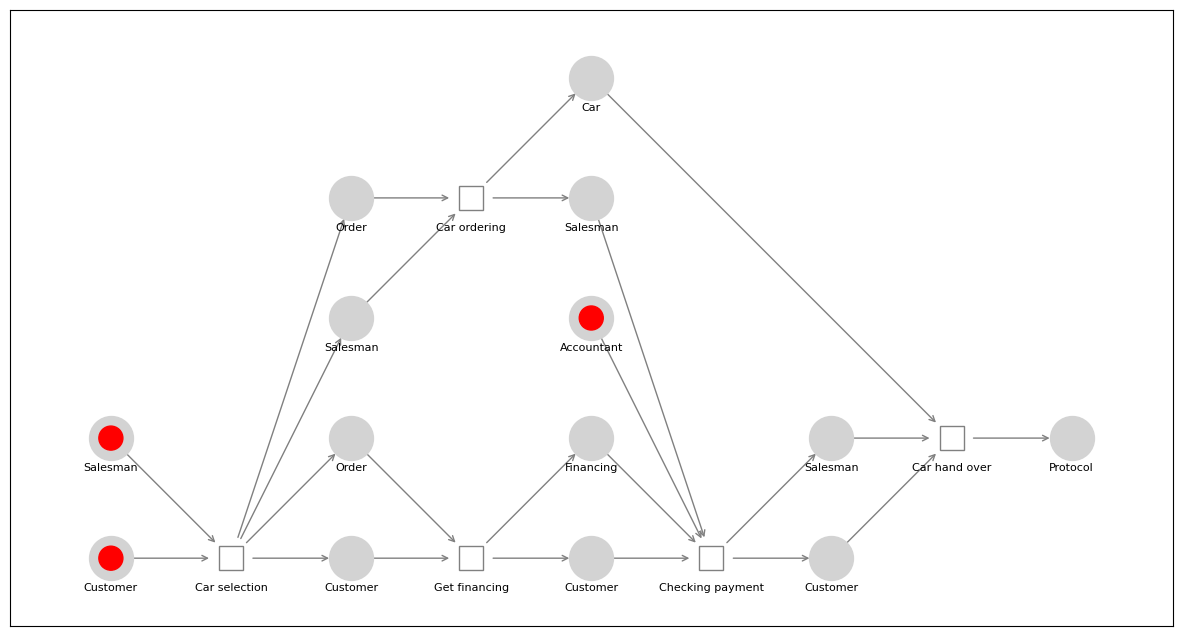

Transition Car selection fired!


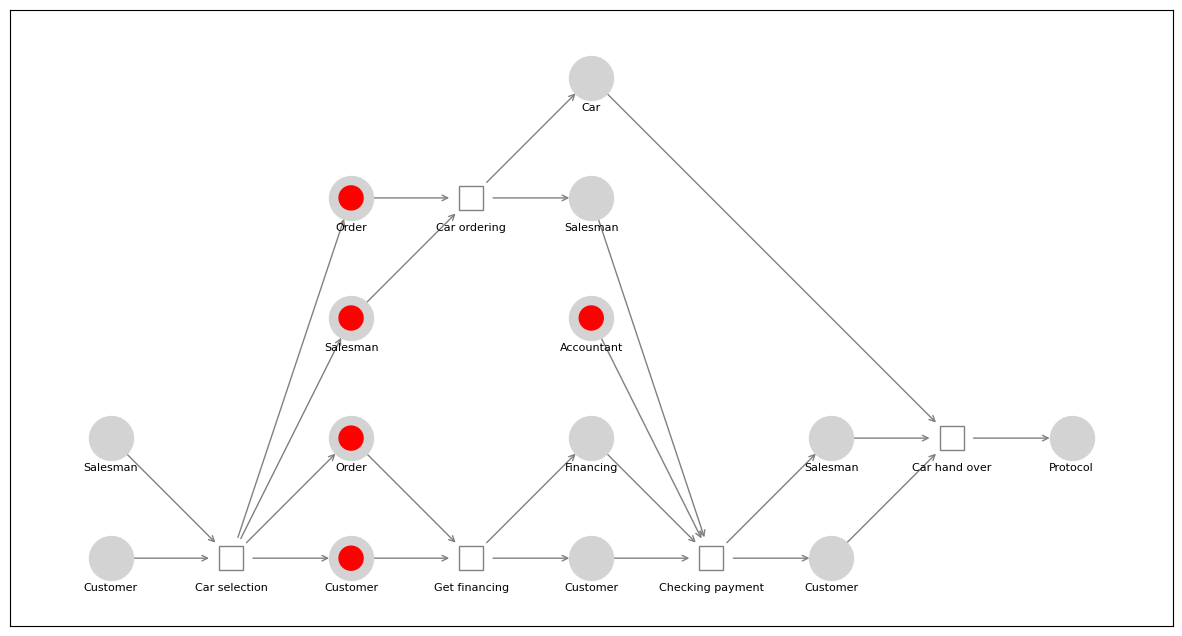

Transition Car ordering fired!


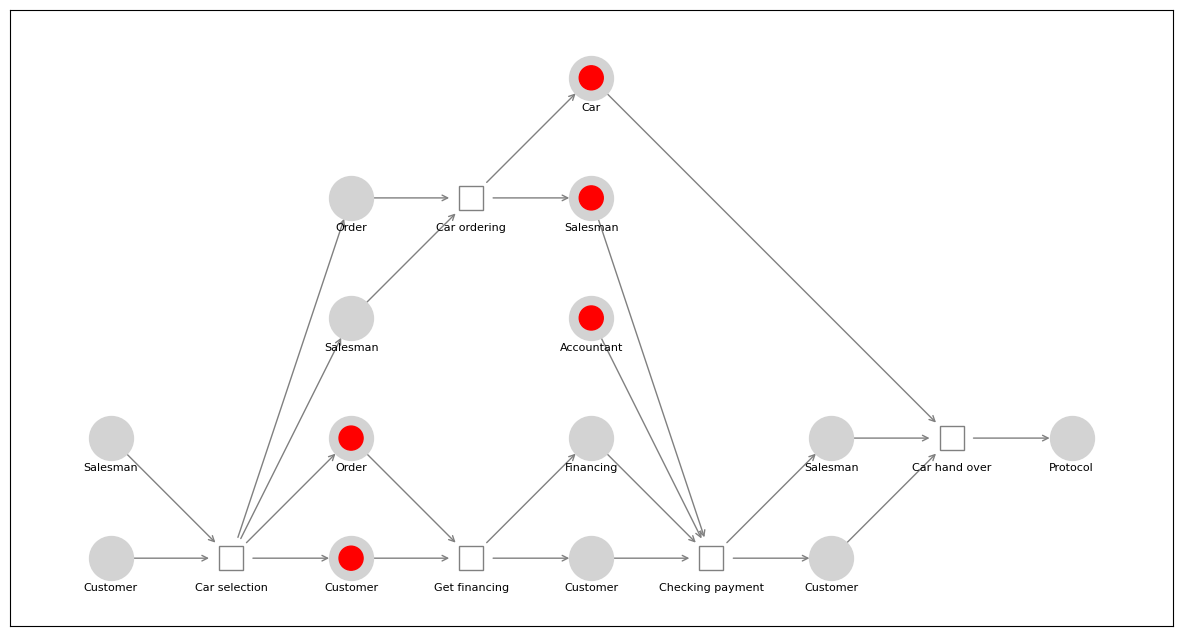

Transition Get financing fired!


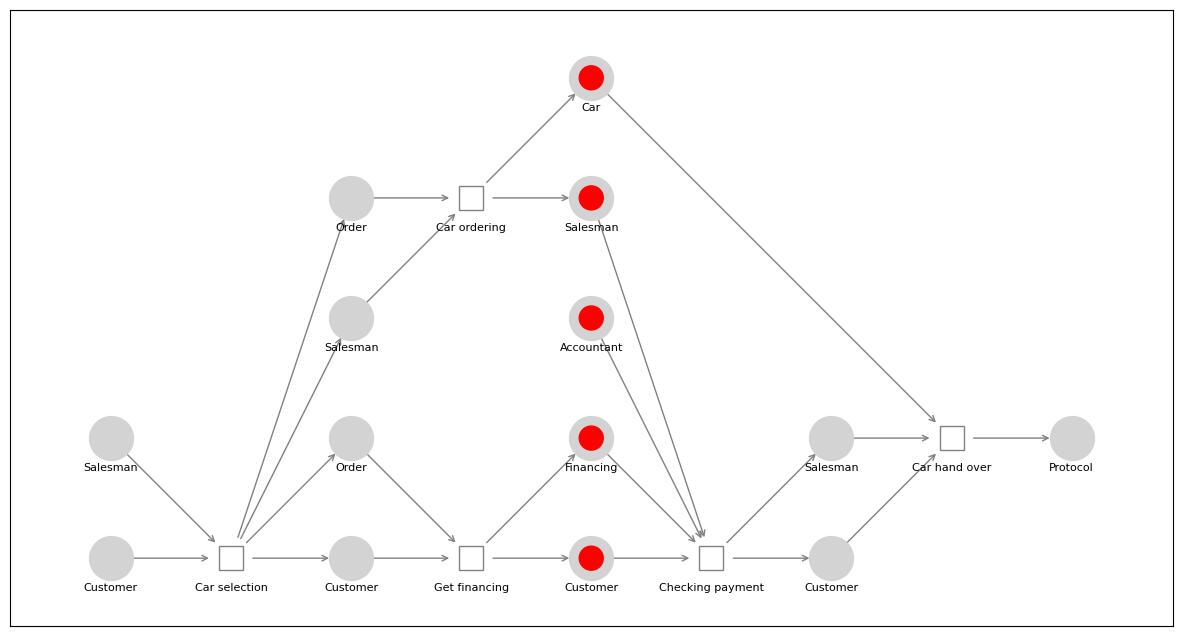

Transition Checking payment fired!


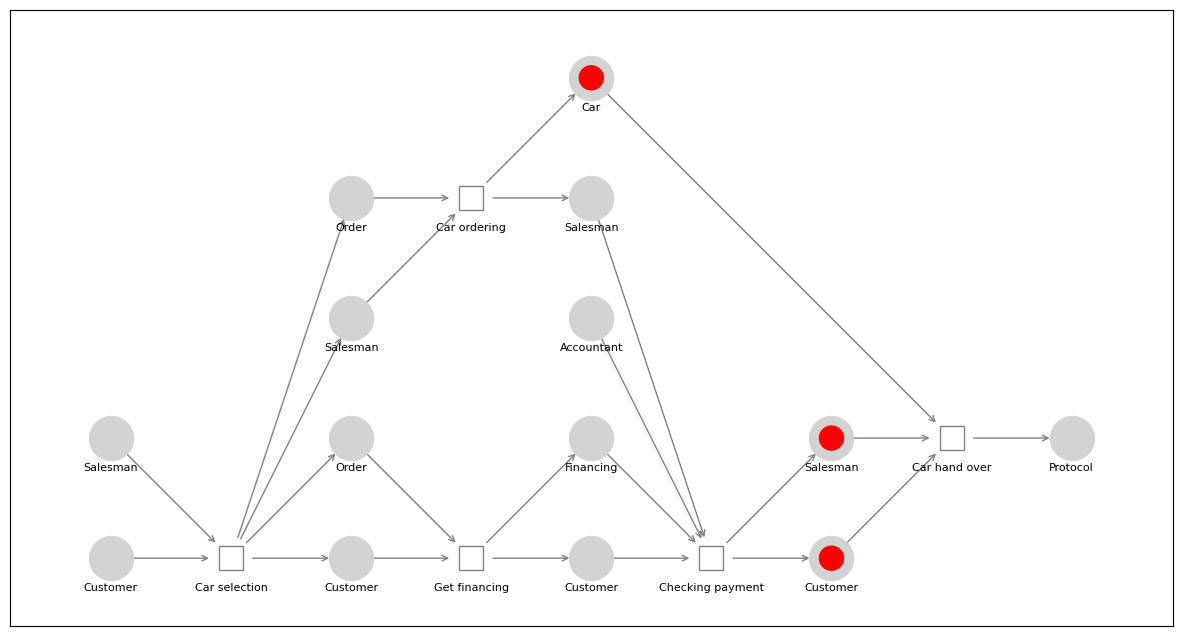

Transition Car hand over fired!


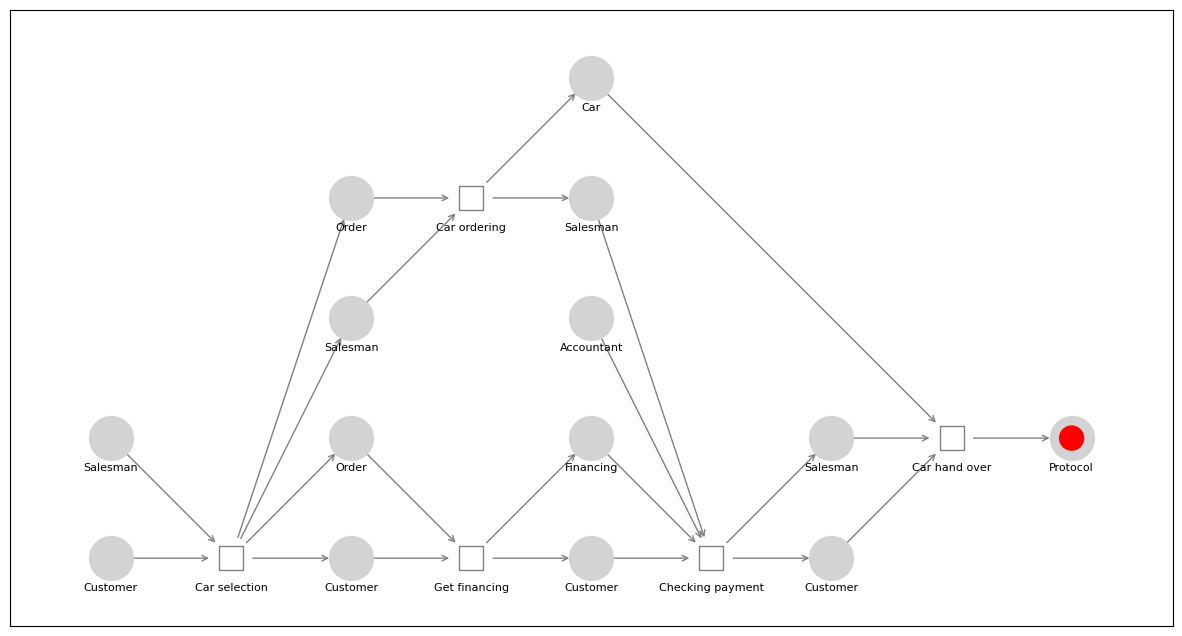

In [11]:

def show_state():
    #input("Press any key to continue ...")
    png.draw_graph()

pn.step_by_step(show_state)

### This is actual result in BPStudio application

![Process Diagram](PN2.png)

Reset Petri Net and run it continuously. 

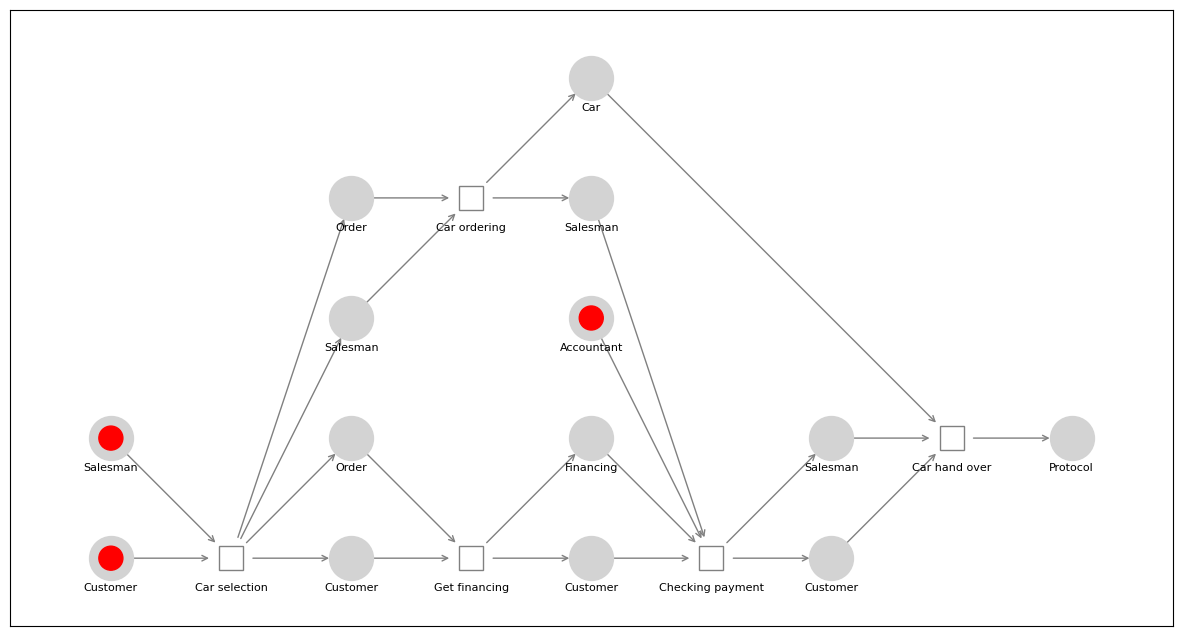

Transition Car selection fired!
Transition Car ordering fired!
Transition Get financing fired!
Transition Checking payment fired!
Transition Car hand over fired!


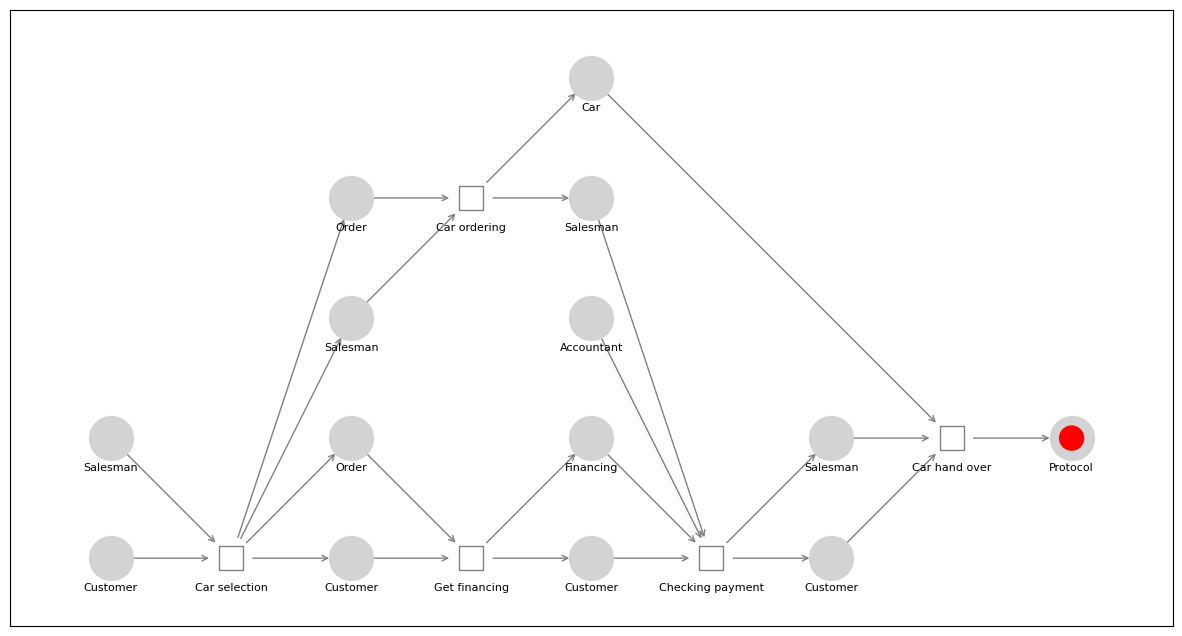

In [12]:
pn.reset()

p00.add_token()
p10.add_token()
p40.add_token()

pn.run(show_state)